In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import warnings
import json
import glob
warnings.filterwarnings('ignore')

/Users/ranyasharma/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sept_df = pd.read_parquet("encrypted_dns_resolver_data/poah/csvdata/netrics_latency_202309.parquet")
oct_df = pd.read_parquet("encrypted_dns_resolver_data/poah/csvdata/netrics_latency_202310.parquet")

In [24]:
temp_df = oct_df[oct_df['tool']=='encrypteddns']

In [25]:
temp_df['target'].unique()

array(['1dot1dot1dot1.cloudflare-dns.com_amazon',
       '1dot1dot1dot1.cloudflare-dns.com_google',
       '1dot1dot1dot1.cloudflare-dns.com_wikipedia',
       'adblock.doh.mullvad.net_amazon', 'adblock.doh.mullvad.net_google',
       'adblock.doh.mullvad.net_wikipedia', 'adl.adfilter.net_amazon',
       'adl.adfilter.net_google', 'adl.adfilter.net_wikipedia',
       'antivirus.bebasid.com_amazon', 'antivirus.bebasid.com_google',
       'antivirus.bebasid.com_wikipedia', 'anycast.dns.nextdns.io_amazon',
       'anycast.dns.nextdns.io_google',
       'anycast.dns.nextdns.io_wikipedia',
       'anycast.uncensoreddns.org_amazon',
       'anycast.uncensoreddns.org_google',
       'anycast.uncensoreddns.org_wikipedia',
       'dns-doh-no-safe-search.dnsforfamily.com_amazon',
       'dns-doh-no-safe-search.dnsforfamily.com_google',
       'dns-doh-no-safe-search.dnsforfamily.com_wikipedia',
       'dns-doh.dnsforfamily.com_amazon',
       'dns-doh.dnsforfamily.com_google',
       'dns-doh.dn

In [4]:
full_df = pd.concat([sept_df, oct_df], axis=0, ignore_index=True )

In [5]:
full_df['tool'].unique()

array(['ping_latency', 'dns_latency', 'last_mile_rtt', 'httping',
       'iperf3', 'ookla', 'ndt7', 'encrypteddns', 'oplat'], dtype=object)

In [6]:
df = full_df[full_df['tool']=='encrypteddns']

In [7]:
df

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg
5011,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_amazon,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
5012,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_google,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
5013,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com_wikipedia,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None
5014,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_amazon,NaN,dig,60637,uchicago,231.0,floto-uchicago,128.135.204.0,False,False,None
5015,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net_google,NaN,dig,60637,uchicago,215.0,floto-uchicago,128.135.204.0,False,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82951610,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org_google,NaN,dig,60637,uchicago,99.0,floto-uchicago,128.135.88.0,False,False,None
82951611,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org_wikipedia,NaN,dig,60637,uchicago,107.0,floto-uchicago,128.135.88.0,False,False,None
82951612,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk_amazon,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None
82951613,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk_google,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None


In [8]:
r = pd.read_json('resolver_geolocation.json')
r.rename(columns = {'resolver':'target'}, inplace = True)
ip_europe = r[(r['country_name']=='France') | (r['country_name']=='Austria') | (r['country_name']=='Russia') | (r['country_name']=='Netherlands') | (r['country_name']=='Spain') | (r['country_name']=='Luxembourg') | (r['country_name']=='Czechia')  | (r['country_name']=='Switzerland')  | (r['country_name']=='United Kingdom')  | (r['country_name']=='Finland')  | (r['country_name']=='Germany')  | (r['country_name']=='Sweden')  | (r['country_name']=='Denmark')]
ip_asia = r[(r['country_name']=='Cyprus') | (r['country_name']=='India') | (r['country_name']=='China') | (r['country_name']=='Japan') | (r['country_name']=='Singapore')  | (r['country_name']=='Indonesia') | (r['country_name']=='Hong Kong')| (r['country_name']=='Taiwan')]
ip_north_america = r[(r['country_name']=='United States') | (r['country_name']=='Canada') ]
ip_australia = r[(r['country_name']=='Australia')]
ip_not_found = r[(r['IP_address'] == 'None')]
#Switch Cloudflare from Aus to NA
ip_australia = ip_australia.drop(labels=41, axis=0)

r.head()

,target,IP_address,country_iso_code,country_name,city_name
0,https://adblock.doh.mullvad.net/dns-query,194.242.2.3,US,United States,New York
1,https://anycast.dns.nextdns.io/dns-query,45.90.30.0,US,United States,None
2,https://anycast.uncensoreddns.org/dns-query,91.239.100.100,DK,Denmark,None
3,https://chewbacca.meganerd.nl/dns-query,136.244.97.114,NL,Netherlands,Amsterdam
4,https://dns-doh-no-safe-search.dnsforfamily.co...,167.235.236.107,DE,Germany,Munich


In [9]:
ip_europe

,target,IP_address,country_iso_code,country_name,city_name
2,https://anycast.uncensoreddns.org/dns-query,91.239.100.100,DK,Denmark,None
3,https://chewbacca.meganerd.nl/dns-query,136.244.97.114,NL,Netherlands,Amsterdam
4,https://dns-doh-no-safe-search.dnsforfamily.co...,167.235.236.107,DE,Germany,Munich
5,https://dns-doh.dnsforfamily.com/dns-query,167.235.236.107,DE,Germany,Munich
10,https://dns.brahma.world/dns-query,157.90.124.62,DE,Germany,None
11,https://dns.circl.lu/dns-query,185.194.94.71,LU,Luxembourg,None
12,https://dns.digitale-gesellschaft.ch/dns-query,185.95.218.43,CH,Switzerland,None
13,https://dns.digitalsize.net/dns-query,94.130.135.203,DE,Germany,None
15,https://dns.njal.la/dns-query,95.215.19.53,FI,Finland,None
17,https://dns.switch.ch/dns-query,130.59.31.248,CH,Switzerland,None


In [10]:
df['domain'] = df['target'].str.split('_').str[1]
df['target'] = df['target'].str.split('_').str[0]

In [11]:
df

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg,domain
5011,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,amazon
5012,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,google
5013,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,wikipedia
5014,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,NaN,dig,60637,uchicago,231.0,floto-uchicago,128.135.204.0,False,False,None,amazon
5015,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,NaN,dig,60637,uchicago,215.0,floto-uchicago,128.135.204.0,False,False,None,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82951610,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,NaN,dig,60637,uchicago,99.0,floto-uchicago,128.135.88.0,False,False,None,google
82951611,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,NaN,dig,60637,uchicago,107.0,floto-uchicago,128.135.88.0,False,False,None,wikipedia
82951612,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None,amazon
82951613,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None,google


In [12]:
df = df[df['target'].notna()]

In [13]:
df

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg,domain
5011,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,amazon
5012,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,google
5013,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,NaN,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,None,wikipedia
5014,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,NaN,dig,60637,uchicago,231.0,floto-uchicago,128.135.204.0,False,False,None,amazon
5015,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,NaN,dig,60637,uchicago,215.0,floto-uchicago,128.135.204.0,False,False,None,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82951610,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,NaN,dig,60637,uchicago,99.0,floto-uchicago,128.135.88.0,False,False,None,google
82951611,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,NaN,dig,60637,uchicago,107.0,floto-uchicago,128.135.88.0,False,False,None,wikipedia
82951612,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None,amazon
82951613,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,NaN,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,None,google


In [14]:
df.replace(np.nan, 0)

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,anonipaddr,ipaddrchanged,error,errormsg,domain
5011,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,0.0,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,0,amazon
5012,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,0.0,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,0,google
5013,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,1dot1dot1dot1.cloudflare-dns.com,0.0,dig,60637,uchicago,7.0,floto-uchicago,128.135.204.0,False,False,0,wikipedia
5014,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,0.0,dig,60637,uchicago,231.0,floto-uchicago,128.135.204.0,False,False,0,amazon
5015,2023-09-11 08:00:27,nm-mngd-20230817-24d4783e,encrypteddns,rtt,dns,adblock.doh.mullvad.net,0.0,dig,60637,uchicago,215.0,floto-uchicago,128.135.204.0,False,False,0,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82951610,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,0.0,dig,60637,uchicago,99.0,floto-uchicago,128.135.88.0,False,False,0,google
82951611,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,unicast.uncensoreddns.org,0.0,dig,60637,uchicago,107.0,floto-uchicago,128.135.88.0,False,False,0,wikipedia
82951612,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,0.0,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,0,amazon
82951613,2023-10-06 20:04:21,nm-mngd-20230127-c4bee240,encrypteddns,rtt,dns,v.dnscrypt.uk,0.0,dig,60637,uchicago,91.0,floto-uchicago,128.135.88.0,False,False,0,google


In [15]:
# Median of each resolver in ascending order(removed the ones with nan)
df_medians = df.groupby('target').value.median()
df_medians = df_medians.dropna()
df_medians = df_medians[df_medians > 0]
df_medians = df_medians.sort_values(ascending=False)
print(df_medians)


target
pdns.itxe.net                       271.000000
sby-doh.limotelu.org                258.965731
family.puredns.org                  251.000000
per.adfilter.net                    245.563269
dns.therifleman.name                243.840218
                                       ...    
anycast.dns.nextdns.io               15.000000
family.cloudflare-dns.com             8.000000
security.cloudflare-dns.com           7.000000
dns.nextdns.io                        3.000000
1dot1dot1dot1.cloudflare-dns.com      3.000000
Name: value, Length: 75, dtype: float64


In [16]:
array_of_resolvers = pd.Series(ip_europe['target']).unique()
new_lst = []
for resolver in array_of_resolvers:
    temp = resolver.replace("https://", "")
    new = temp.replace("/dns-query", "")
    new_lst.append(new)

In [17]:
new_lst

['anycast.uncensoreddns.org',
 'chewbacca.meganerd.nl',
 'dns-doh-no-safe-search.dnsforfamily.com',
 'dns-doh.dnsforfamily.com',
 'dns.brahma.world',
 'dns.circl.lu',
 'dns.digitale-gesellschaft.ch',
 'dns.digitalsize.net',
 'dns.njal.la',
 'dns.switch.ch',
 'dns1.ryan-palmer.com',
 'dns10.quad9.net',
 'dns11.quad9.net',
 'dns12.quad9.net',
 'dnsforge.de',
 'dnsse-noads.alekberg.net',
 'dnsse.alekberg.net',
 'doh.dnscrypt.uk',
 'doh.ffmuc.net',
 'doh.libredns.gr',
 'doh.nl.ahadns.net',
 'ibksturm.synology.me',
 'odoh-target-noads-se.alekberg.net',
 'odoh-target-se.alekberg.net',
 'unicast.uncensoreddns.org',
 'v.dnscrypt.uk',
 'dnsnl-noads.alekberg.net',
 'dnsnl.alekberg.net',
 'odoh-target-noads.alekberg.net',
 'odoh-target.alekberg.net']

In [18]:
array_of_resolvers = new_lst

dict_resp_time_series={}
length=len(array_of_resolvers)

both_resp=[0]*length
resp_time_series=[0]*length

for i in range(length):
    both_resp[i]=df[(df['target']==array_of_resolvers[i])]
    resp_time_series[i]=(both_resp[i]['value'])
    y_axis = array_of_resolvers
    temp = [s.replace("https://", "") for s in y_axis]
    new_list = [s.replace("/dns-query", "") for s in temp]
    dict_resp_time_series[new_list[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)

medians = frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
response_times = frame_to_plot[medians.index]

clear=[]
for a in range(len(new_list)):
    x = new_list[a]
    if response_times[x].count() != 0.0:
        print (x, ":", response_times[x].median())
        clear.append(x)

anycast.uncensoreddns.org : 119.0
chewbacca.meganerd.nl : 95.0
dns-doh-no-safe-search.dnsforfamily.com : 119.0
dns-doh.dnsforfamily.com : 119.0
dns.brahma.world : 115.48852920532227
dns.circl.lu : 103.23619842529297
dns.digitale-gesellschaft.ch : 110.06665229797363
dns.digitalsize.net : 119.0
dns.njal.la : 103.0
dns.switch.ch : 111.0
dns1.ryan-palmer.com : 99.0
dns10.quad9.net : 18.827438354492188
dns11.quad9.net : 20.302295684814453
dns12.quad9.net : 19.661903381347656
dnsforge.de : 119.0
dnsse-noads.alekberg.net : 124.79555606842041
dnsse.alekberg.net : 124.0
doh.dnscrypt.uk : 95.0
doh.ffmuc.net : 211.0
doh.libredns.gr : 116.0
doh.nl.ahadns.net : 107.0
ibksturm.synology.me : 127.0
odoh-target-noads-se.alekberg.net : 124.9396800994873
odoh-target-se.alekberg.net : 124.66490268707275
unicast.uncensoreddns.org : 99.27475452423096
v.dnscrypt.uk : 91.0
dnsnl-noads.alekberg.net : 103.0
dnsnl.alekberg.net : 103.0
odoh-target-noads.alekberg.net : 119.49372291564941
odoh-target.alekberg.net :

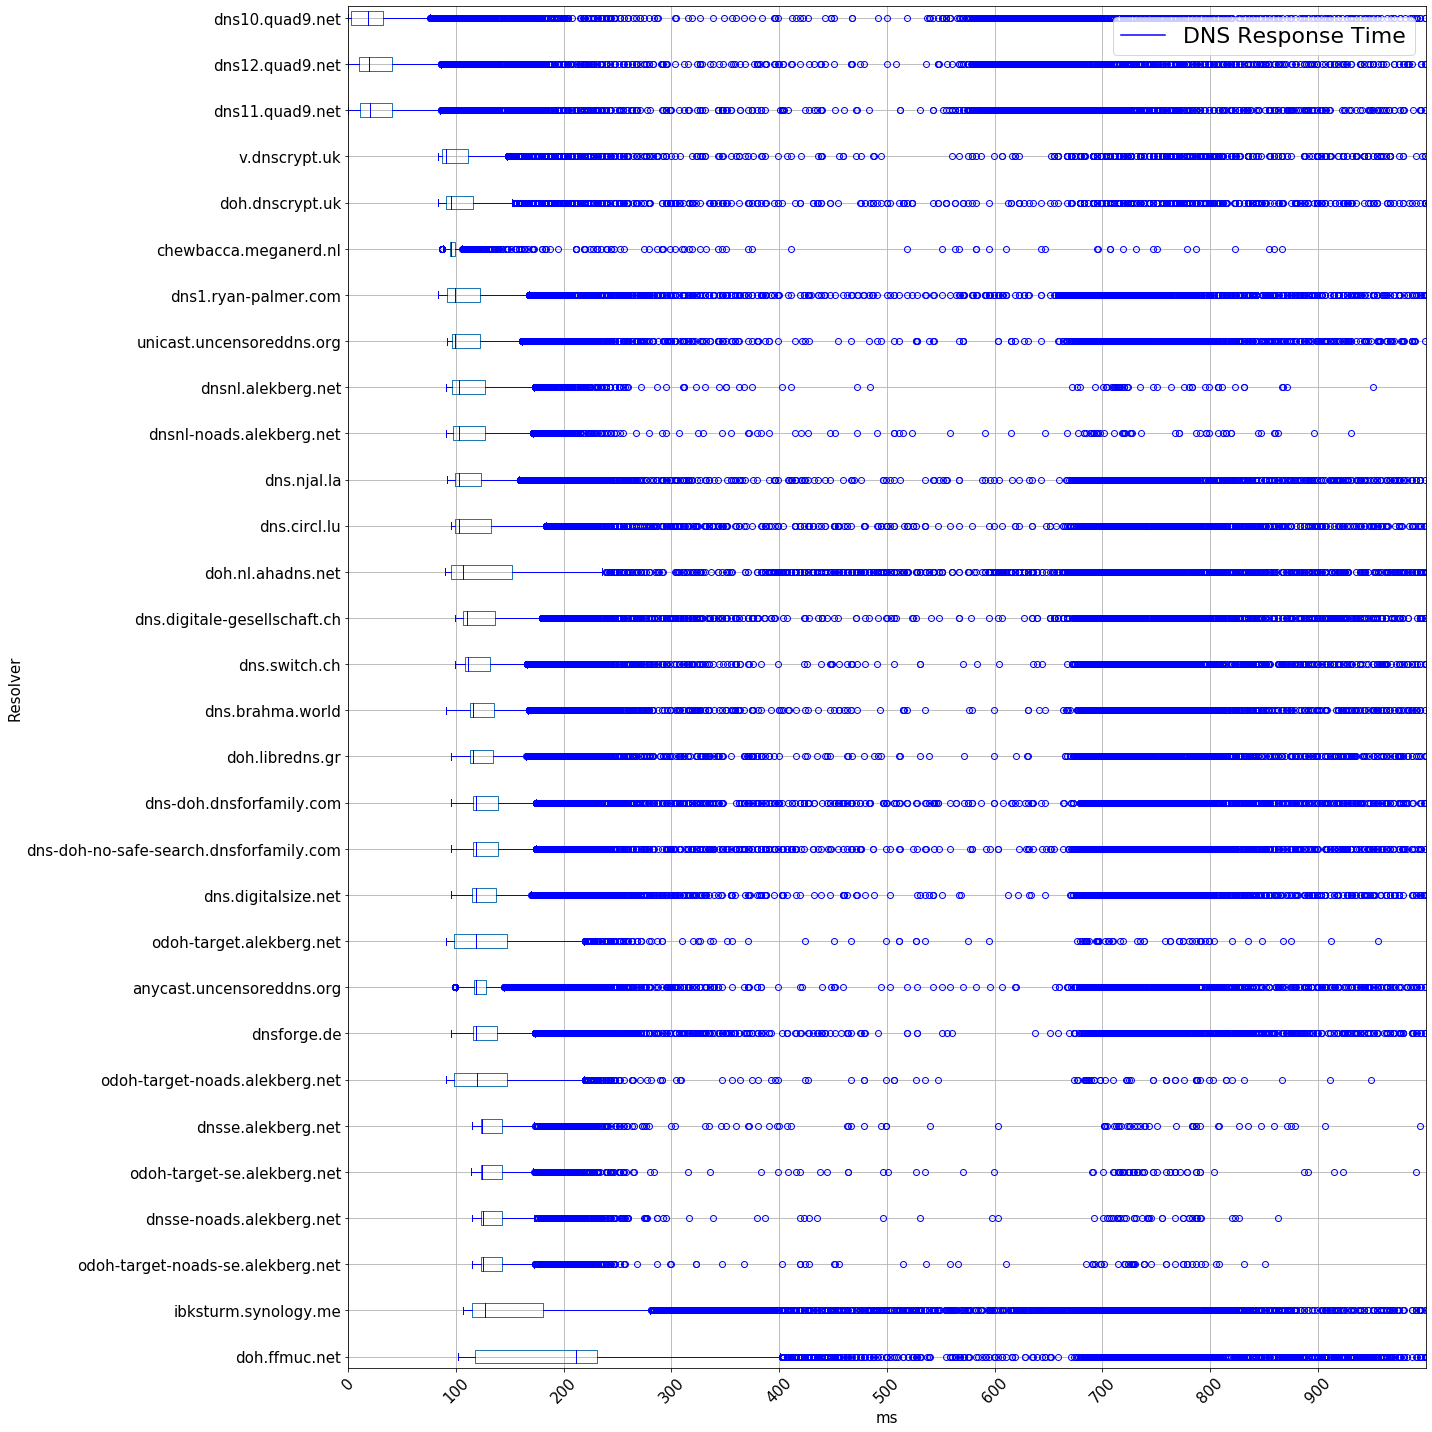

In [19]:
## This boxplot sorts by ascending order of DNS response time

array_of_resolvers = new_lst

dict_resp_time_series={}
length=len(array_of_resolvers)

both_resp=[0]*length
resp_time_series=[0]*length

for i in range(length):
    both_resp[i]=df[(df['target']==array_of_resolvers[i])]
    resp_time_series[i]=(both_resp[i]['value'])
    y_axis = array_of_resolvers
    temp = [s.replace("https://", "") for s in y_axis]
    new_list = [s.replace("/dns-query", "") for s in temp]
    if(new_list[i] in clear):
        dict_resp_time_series[new_list[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)

#Make two plots and merge
c = "blue"
z = "red"


medians = frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)

boxplot = response_times.boxplot(vert=False,figsize=(20,20),showfliers=True,capprops=dict(color=c),whiskerprops=dict(color=c),flierprops=dict(color=c, markeredgecolor=c),medianprops=dict(color=c), meanprops=dict(color=c),  positions=np.array(range(len(dict_resp_time_series)))*2.0-0.4, widths=0.6)

plt.plot([], c='blue', label='DNS Response Time')
plt.legend(loc = 'upper right', fontsize=22)

xl = 1000
plt.xlim(0,xl)
plt.xlabel('ms', fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('Resolver', fontsize=15)

#plt.xscale('log')

plt.xticks(np.arange(0, xl, step=100), fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.grid(True)
plt.savefig("Europe_boxplot.pdf")
plt.show()
